In [1]:
import glob
from random import shuffle
import h5py
import numpy as np
import cv2
import math
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def normalize_and_write_data_into_h5_file(dest_filepath, filepaths_list, n_px, n_channels = 3):
    
    '''
        This function converts images to numpy arrays and writes the array data into a h5 file.
        
        dest_filepath - the name of the file with full path that is being created
        filepaths_list - source image file paths which is being converted to numpy arrays
        n_px - number of pixels - will be used as image's height and width
        n_channels - 3 for rgb
    '''
    
    data_shape = (len(filepaths_list), n_px * n_px * n_channels)
    dataset_name = "input_data"
    
    with h5py.File(dest_filepath, 'a') as f:
        
        f.create_dataset(dataset_name, data_shape, np.float32)
        
        for i in range(len(filepaths_list)):
            #if (i+1) % 512 == 0:
            #    print('{}/{} files converted'.format((i+1), len(filepaths_list)))

            filepath = filepaths_list[i]
            img = cv2.imread(filepath)
            img = cv2.resize(img, (n_px, n_px), interpolation=cv2.INTER_CUBIC)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            #Normalize the image - convert the each pixel value between 0 and 1
            img = img / 255
            #Reshape the image - roll it up into a column vector
            img = img.ravel()
            
            #img[None] makes it a proper array instead of rank 1 array
            f[dataset_name][i, ...] = img[None]

In [3]:
def write_labels_into_h5_file(dest_filepath, labels):
    
    dataset_name = "input_labels"
    
    with h5py.File(dest_filepath, 'a') as f:
        f.create_dataset(dataset_name, (len(labels),), np.int8)
        f[dataset_name][...] = labels

In [4]:
def convert_images_to_data_in_h5_file(src_img_filepath_pattern, dest_h5_file_path, n_px, 
                                      n_channels = 3, batch_size = 1024):
    
    #Returns a list of filepaths matching the pattern given as parameter
    src_filepaths = glob.glob(src_img_filepath_pattern)
    
    #Create Labels based upon the substring contained in the filename
    labels = [0 if 'cat' in filepath else 1 for filepath in src_filepaths]
    
    #The zip(source_filepaths, labels) combines each element of source_filepaths list 
    #with each element of labels list forming a pair (tuple). t is the list which contains these tuples
    t = list(zip(src_filepaths, labels))

    #Shuffle the list
    shuffle(t)
    
    #Get the shuffled filepaths & labels
    src_filepaths, labels = zip(*t)
    
    #Number of images
    m = len(src_filepaths) 
    n_complete_batches = math.ceil(m / batch_size)
    
    for i in range(n_complete_batches):
        print('Creating file', (i+1))
        
        dest_file_path = dest_h5_file_path + str(i + 1) + ".h5"   
        
        start_pos = i * batch_size
        end_pos = min(start_pos + batch_size, m)
        src_filepaths_batch = src_filepaths[start_pos: end_pos]
        labels_batch = labels[start_pos: end_pos]
        
        normalize_and_write_data_into_h5_file(dest_file_path, src_filepaths_batch, n_px)
        write_labels_into_h5_file(dest_file_path, labels_batch)

In [6]:
src_filepath_pattern = 'datasets/train/*.jpg'
dest_filepath = 'datasets/dog_vs_cat_normalized_dataset_kaggle_128px_'
n_px = 128
n_channels = 3

tic = time.process_time()
convert_images_to_data_in_h5_file(src_filepath_pattern, dest_filepath, n_px, n_channels)
toc = time.process_time()
print('Time taken for creating the h5 file is', (toc-tic)*1000, 'ms')

Creating file 1
Creating file 2
Creating file 3
Creating file 4
Creating file 5
Creating file 6
Creating file 7
Creating file 8
Creating file 9
Creating file 10
Creating file 11
Creating file 12
Creating file 13
Creating file 14
Creating file 15
Creating file 16
Creating file 17
Creating file 18
Creating file 19
Creating file 20
Creating file 21
Creating file 22
Creating file 23
Creating file 24
Creating file 25
Time taken for creating the h5 file is 460187.5 ms


In [7]:
destination_filepath = 'datasets/dog_vs_cat_normalized_dataset_kaggle_128px_1.h5'
with h5py.File(destination_filepath, "r") as f:
    
    print(list(f.keys()))
    
    x = f["input_data"][:]
    y = f["input_labels"][:]

    print('x shape =', x.shape, '| y shape =', y.shape)

['input_data', 'input_labels']
x shape = (1024, 49152) | y shape = (1024,)


y = 1


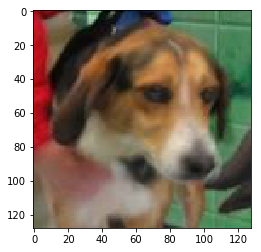

In [8]:
index = 0
image = x[index]
#print(image)
#print(image.shape)
image = (x[index]).reshape(128, 128, 3)
plt.imshow(image)
print('y =', y[index])